In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [71]:
# create random dataset
X = np.vstack([(np.random.rand(10,2)*5), (np.random.rand(10,2)*10)])
Y = np.hstack([[0]*10, [1]*10])

dataset = pd.DataFrame(X, columns={"X1", "X2"})
dataset["Y"] = Y

In [72]:
dataset

,X2,X1,Y
0,1.939473,0.243935,0
1,2.348233,4.383587,0
2,3.808635,0.165445,0
3,4.496411,2.675372,0
4,4.892664,2.651377,0
5,4.113260,0.175060,0
6,4.707514,2.786750,0
7,4.908800,2.207914,0
8,3.956205,3.602765,0
9,0.157102,2.312980,0


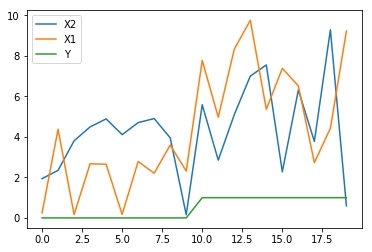

In [73]:
plt.plot(dataset, label='Inline label')
plt.legend(["X2", "X1", "Y"])

In [74]:
# create target variables to vector of number of classes
# one-hot encoding
Z = np.zeros((20,2))
for i in range(20):
    Z[i, Y[i]] = 1


In [75]:
X

array([[1.93947345, 0.24393505],
       [2.34823264, 4.38358717],
       [3.80863541, 0.16544485],
       [4.4964112 , 2.6753721 ],
       [4.89266371, 2.65137674],
       [4.11325984, 0.17505995],
       [4.70751398, 2.78675046],
       [4.90880017, 2.20791389],
       [3.95620478, 3.60276509],
       [0.15710219, 2.31298038],
       [5.58998735, 7.78290501],
       [2.85440883, 4.9753497 ],
       [5.10091165, 8.33303222],
       [7.00733638, 9.76527312],
       [7.55604151, 5.36719964],
       [2.27871839, 7.38890729],
       [6.31672394, 6.52323097],
       [3.78006523, 2.73347945],
       [9.294251  , 4.42453903],
       [0.59513144, 9.22857333]])

In [76]:
# Initializing Random weights and biases
# 3 neurons in first layer
# 2 neurons in the second layer

Wi_1 = np.random.randn(3,2)
Bi_1 = np.random.randn(3)

Wi_2 = np.random.randn(3,2)
Bi_2 = np.random.randn(2)

In [77]:
Wi_1

array([[ 0.28252134, -1.85564043],
       [ 1.30709815,  0.89386993],
       [-1.25320383, -0.93454904]])

In [78]:
Bi_1

array([-1.07134485,  1.1542182 ,  1.11845081])

In [79]:
Wi_2

array([[ 2.03456725, -0.85518575],
       [-1.03347231, -1.24340077],
       [ 0.50201117,  1.00649194]])

In [80]:
Bi_2

array([-0.14950602, -0.05501284])

In [81]:
X

array([[1.93947345, 0.24393505],
       [2.34823264, 4.38358717],
       [3.80863541, 0.16544485],
       [4.4964112 , 2.6753721 ],
       [4.89266371, 2.65137674],
       [4.11325984, 0.17505995],
       [4.70751398, 2.78675046],
       [4.90880017, 2.20791389],
       [3.95620478, 3.60276509],
       [0.15710219, 2.31298038],
       [5.58998735, 7.78290501],
       [2.85440883, 4.9753497 ],
       [5.10091165, 8.33303222],
       [7.00733638, 9.76527312],
       [7.55604151, 5.36719964],
       [2.27871839, 7.38890729],
       [6.31672394, 6.52323097],
       [3.78006523, 2.73347945],
       [9.294251  , 4.42453903],
       [0.59513144, 9.22857333]])

In [82]:
X.shape

(20, 2)

In [83]:
(Wi_1.T).shape

(2, 3)

In [84]:
m = X.dot(Wi_1.T)

In [85]:
m.shape

(20, 3)

In [86]:
Bi_1.shape

(3,)

In [87]:
z = X.dot(Wi_1.T) + Bi_1
z.shape

(20, 3)

In [88]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [89]:
# Defining the forward propagation function
def forward_prop(X, Wi_1, Bi_1, Wi_2, Bi_2):
    #first layer
    z = X.dot(Wi_1.T) + Bi_1
    M = sigmoid(z)
    
    #second layer
    A = M.dot(Wi_2) + Bi_2
    
    #softmax functiom
    expA = np.exp(A)
    Y = expA / expA.sum(axis=1, keepdims=True)
    return Y, M
    

# Y = [x1, x2] x1 = class prob of class 1, x2 = class prob of class 2
# M = weight matrix

In [90]:
forward_prop(X, Wi_1, Bi_1, Wi_2, Bi_2)

(array([[0.69276951, 0.30723049],
        [0.52861572, 0.47138428],
        [0.79120643, 0.20879357],
        [0.53478724, 0.46521276],
        [0.53584959, 0.46415041],
        [0.7996703 , 0.2003297 ],
        [0.53399885, 0.46600115],
        [0.54472578, 0.45527422],
        [0.52967057, 0.47032943],
        [0.50242326, 0.49757674],
        [0.5288272 , 0.4711728 ],
        [0.52877346, 0.47122654],
        [0.52882674, 0.47117326],
        [0.52882683, 0.47117317],
        [0.52892518, 0.47107482],
        [0.52880403, 0.47119597],
        [0.52883462, 0.47116538],
        [0.5330227 , 0.4669773 ],
        [0.52975176, 0.47024824],
        [0.52879208, 0.47120792]]),
 array([[2.73674670e-01, 9.80302058e-01, 1.76524515e-01],
        [1.95006901e-04, 9.99709014e-01, 2.67523155e-03],
        [4.24987938e-01, 9.98130783e-01, 2.16860381e-02],
        [8.44632731e-03, 9.99919156e-01, 8.95944850e-04],
        [9.86288388e-03, 9.99950792e-01, 5.57831471e-04],
        [4.41738477e-01, 9.9

In [91]:
# Back-propagation by differentiating or Gradient Descent

# H = hidden layer (weight matrix)
# Z = actual 
# Y = predicted
# output = prediction prob

# return derivative for weight_2
def diff_Wi_2(H, Z, Y):
    return H.T.dot(Z-Y)

# return derivative for weight_1
def diff_Wi_1(X, H, Z, output, Wi_2):
    dz = (Z-output).dot(Wi_2.T) * H * (1-H)
    return X.T.dot(dz)

# return derivative for bias_1
def diff_B2(Z, Y):
    return (Z-Y).sum(axis=0)

# return derivative for bias_2
def diff_B1(Z, Y, Wi_2, H):
    return ((Z-Y).dot(Wi_2.T) * H * (1-H)).sum(axis=0)

In [92]:
# back-propagation and adjusting the weights and biases
learning_rate = 1e-3
for epoch in range(5000):
    output, hidden = forward_prop(X, Wi_1, Bi_1, Wi_2, Bi_2)
    Wi_2 = Wi_2 + learning_rate * diff_Wi_2(hidden, Z, output)
    Bi_2 = Bi_2 + learning_rate * diff_B2(Z, output)
    Wi_1 = Wi_1 + learning_rate * diff_Wi_1(X, hidden, Z, output, Wi_2).T
    Bi_1 = Bi_1 + learning_rate * diff_B1(Z, output, Wi_2, hidden)
    

In [93]:
# prediction
X_test = np.array([5, 7])
hidden_output = 1/(1+np.exp(-X_test.dot(Wi_1.T)-Bi_1))
outer_layer_output = hidden_output.dot(Wi_2)
expA = np.exp(outer_layer_output)
Y = expA/expA.sum()
print(Y)

[0.32604815 0.67395185]
